In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib as mpl

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Table of Contents
>## 1. Entropy
* 1.1. Definition
* 1.2. Properties
* 1.3. Variable Length Encoding
* 1.4. Entropy of Sample Data
* 1.5. Conditional Entropy
* 1.6. Cross Entropy
* 1.7. Kullback-Leibler Divergence (a.k.a. Relative Entropy)
* 1.8. Gini Impurity

>## 2. 

# 1. Entropy
## 1.1. Definition

* **Discrete Random Variable**:

>$$ H[Y] = -\sum_{k=1}^K p(y_k) \log_2 p(y_k) $$
>* $p(y)$: pmf

* **Continous Random Variable**:

>$$ H[Y] = -\int p(y) \log_2 p(y) \; dy $$
>* $p(y)$: pdf

* When $p(y)=0$: (derived from l'Hôpital's rule)

>$$ \lim_{p\rightarrow 0} \; p\log_2{p} = 0 $$

## 1.2. Properties

* **Minimum Entropy**:

>$$H=0$$
>* This is when $p(y)=1$ for some $y$

* **Maximum Entropy**: (if the discrete rv can take $2^K$ classes)

>$$ H = -\frac{2^K}{2^K}\log_2\dfrac{1}{2^K} = K $$
>* This is when every class has same probability mass

## 1.3. Variable Length Encoding
* Encode $A$, $B$, $C$, $D$
* The probability mass for each letter: $ \Big\{ \dfrac{1}{2}, \dfrac{1}{4}, \dfrac{1}{8}, \dfrac{1}{8} \Big\} $
* Then, it is wise to encode them as: $ A = 0, B = 10, C = 110, D = 111 $
* Then, the average no. of bits required for a letter is:

$$ 
\left(1000 \times \dfrac{1}{2}\right) \cdot 1 + 
\left(1000 \times \dfrac{1}{4}\right) \cdot 2 + 
\left(1000 \times \dfrac{1}{8}\right) \cdot 3 + 
\left(1000 \times \dfrac{1}{8}\right) \cdot 3 = 1750 \rightarrow 1.75 \;\text{bit/letter}
$$

* This is equivalent to the entropy

>$$ H = -\dfrac{1}{2}\log_2\dfrac{1}{2} -\dfrac{1}{4}\log_2\dfrac{1}{4} -\dfrac{2}{8}\log_2\dfrac{1}{8} = 1.75 $$

## 1.4. Entropy of Sample Data
* If pmf is not given, infer it from the sample counts

## 1.5. Conditional Entropy
* **Definition**:

>$$ H[Y \mid X] = - \sum_i \sum_j \,p(x_i, y_j) \log_2 p(y_j \mid x_i)  $$
>
>$$ H[Y \mid X] = -\int \int p(x, y) \log_2 p(y \mid x) \; dxdy $$

* **Modified Definition:**:

>$$ H[Y \mid X]  = \sum_i \,p(x_i)\,H[Y \mid x_i] $$
>
>$$ H[Y \mid X]  = \int p(x)\,H[Y \mid x] \; dx $$

* **Proof for Modification - discrete rv**:

>$$ 
\begin{eqnarray}
H[Y \mid X] 
&=& - \sum_i \sum_j \,p(x_i, y_j) \log_2 p(y_j \mid x_i) \\
&=& - \sum_i \sum_j p(y_j \mid x_i) p(x_i) \log_2 p(y_j \mid x_i) \\
&=& - \sum_i p(x_i) \sum_j p(y_j \mid x_i)  \log_2 p(y_j \mid x_i) \\
&=& \sum_i p(x_i) H[Y \mid x_i] \\
\end{eqnarray}
$$

## 1.6. Cross Entropy
* **Definition**:

>$$ H[p,q] = -\sum_{k=1}^K p(y_k) \log_2 q(y_k) $$
>
>$$ H[p,q] = -\int p(y) \log_2 q(y) dy $$

* Usage - comparison between **true** and **pred**
* E.g. binary prediction, $Y$ and $\hat{Y}$

* **Obtained using $\theta$**

>$$ \begin{eqnarray}
H[Y, \hat{Y}] 
&=& -\theta \log_2 \hat{\theta} - (1 - \theta) \log_2 (1 - \hat{\theta}) \\
\end{eqnarray} $$

* **Estimated from data:**

>$$ 
\begin{eqnarray}
H[Y, \hat{Y}] 
&\approx& -\dfrac{1}{N} \sum_{i=1}^N \left( y_i \log_2 \hat{y}_i + (1 - y_i) \log_2 (1 - \hat{y}_i) \right) \\
\end{eqnarray}
$$


## 1.7. Kullback-Leibler Divergence (a.k.a. Relative Entropy)
* Quantitative measure of the difference between $p(y)$ and $q(y)$
* Becomes zero iff $p(y)=q(y)$
* **Definition**:

>$$ 
\begin{eqnarray}
KL(p || q)  
&=& H[p, q] - H[p]
&=& \int p(y) \log_2 \left(\dfrac{p(y)}{q(y)}\right) dy
\end{eqnarray}
$$


## 1.8. Gini Impurity
* Measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset
* Frequently used alternative for Entropy ($\leftarrow$ simplicity in calculation, does not requre $log$ calculation)

>$$ G[Y] = \sum_{k=1}^K p(y_k) (1 - p(y_k)) $$

# 2. Decision Tree
* Can be used for both classification & regression
* A.k.a. **CART**(**C**lassification **A**nd **R**egression **T**ree)
* **Method**:
  * 1. Choose an independent variable
  * 2. Set threshold & make it a decision node
  * 3. Continue such process until each sub-group is of single category

>$$ P(Y=k|X)_{\text{node}} \approx \dfrac{N_{\text{node},k}}{N_{\text{node}}} $$
>
>$$ \hat{Y} = \text{arg}\max_k P(Y=k|X_{\text{test}})_{\text{last node}} $$

## 2.1. Information Gain
* Measure of **decrease in entropy**
* Threshold is selected to maximize the IG
* **Definition**:

>$$ IG[Y,X] = H[Y] - H[Y|X] $$

## 2.2. Information Gain - Example

<img src="https://datascienceschool.net/upfiles/50d9204d21e840a3915d941667843c78.png" style="width:70%; margin: 0 auto 0 auto;">

* **Entropy - Parent Node**:

>$$ H[Y] = -\dfrac{1}{2}\log_2\left(\dfrac{1}{2}\right) -\dfrac{1}{2}\log_2\left(\dfrac{1}{2}\right) = \dfrac{1}{2} + \dfrac{1}{2}  = 1 $$

* **Entropy - A**

>$$ H[Y|X=X_1] = -\dfrac{3}{4}\log_2\left(\dfrac{3}{4}\right) -\dfrac{1}{4}\log_2\left(\dfrac{1}{4}\right) = 0.81 $$
>
>$$ H[Y|X=X_2] = -\dfrac{1}{4}\log_2\left(\dfrac{1}{4}\right)  -\dfrac{3}{4}\log_2\left(\dfrac{3}{4}\right) = 0.81 $$
>
>$$ H[Y|X] = \dfrac{1}{2} H[Y|X=X_1] + \dfrac{1}{2} H[Y|X=X_2] = 0.81 $$
>
>$$ IG = H[Y] - H[Y|X] = 0.19 $$ 

* **Entropy - B**

>$$ H[Y|X=X_1] = -\dfrac{1}{3}\log_2\left(\dfrac{1}{3}\right) - \dfrac{2}{3}\log_2\left(\dfrac{2}{3}\right) = 0.92 $$
>
>$$ H[Y|X=X_2] = 0 $$
>
>$$ H[Y|X] = \dfrac{3}{4} H[Y|X=X_1] + \dfrac{1}{4} H[Y|X=X_2] = 0.69 $$
>
>$$ IG = H[D] - H[Y|X] = 0.31 $$ 

## 2.3. Visualization of the Decision Tree

In [16]:
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=iris.feature_names[2:])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

## 2.4. Decision Tree in `Scikit-Learn`
* Available through `DecisionTreeClassifier`

### Example 1 - Iris Dataset
* For simplicity, let's only consider the petal width & length

In [17]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

In [19]:
draw_decision_tree(tree1)

FileNotFoundError: [Errno 2] "dot" not found in path.

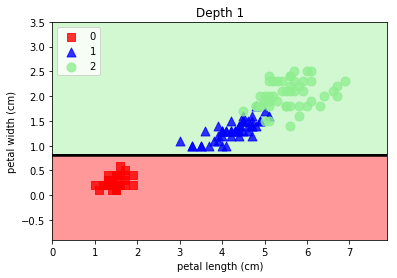

In [20]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]])

In [22]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(X, y)

In [23]:
draw_decision_tree(tree2)

FileNotFoundError: [Errno 2] "dot" not found in path.

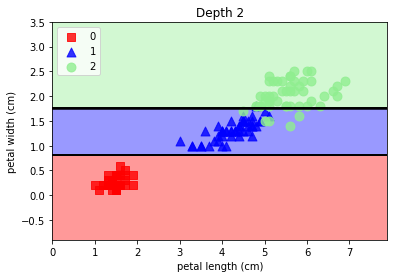

In [24]:
plot_decision_regions(X, y, tree2, "Depth 2")
plt.show()

In [25]:
confusion_matrix(y, tree2.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

In [26]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X, y)

In [27]:
draw_decision_tree(tree3)

FileNotFoundError: [Errno 2] "dot" not found in path.

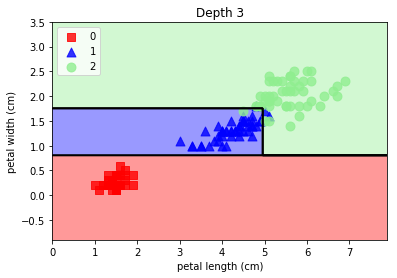

In [28]:
plot_decision_regions(X, y, tree3, "Depth 3")
plt.show()

In [29]:
confusion_matrix(y, tree3.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [30]:
tree4 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0).fit(X, y)

In [31]:
draw_decision_tree(tree4)

FileNotFoundError: [Errno 2] "dot" not found in path.

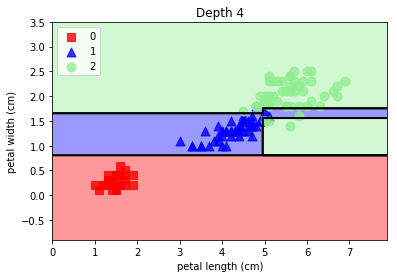

In [32]:
plot_decision_regions(X, y, tree4, "Depth 4")
plt.show()

In [33]:
confusion_matrix(y, tree4.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])

In [34]:
tree5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0).fit(X, y)

In [35]:
draw_decision_tree(tree5)

FileNotFoundError: [Errno 2] "dot" not found in path.

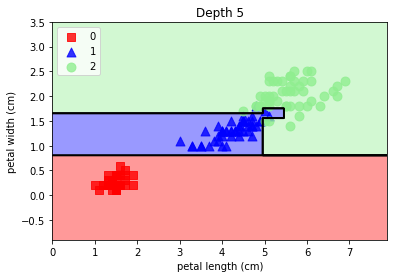

In [36]:
plot_decision_regions(X, y, tree5, "Depth 5")
plt.show()

In [37]:
confusion_matrix(y, tree5.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]])

### Performance comparison for different sets of 2 variables

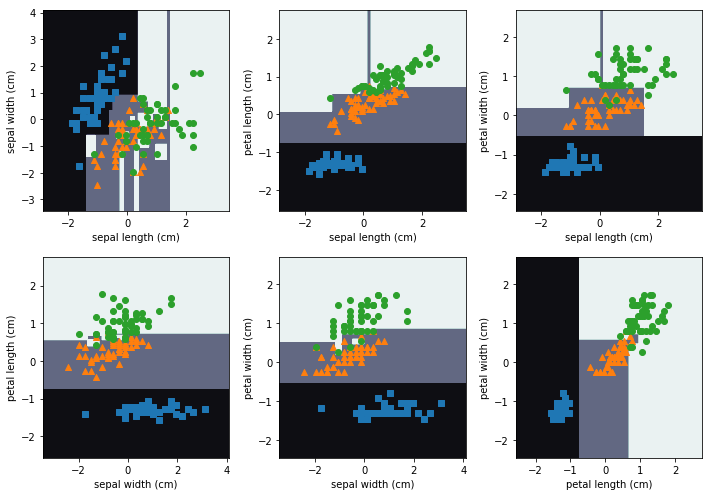

In [38]:
from itertools import combinations

n_classes = 3
markers = ('s', '^', 'o')
plot_step = 0.02

plt.figure(figsize=(10, 7))
for pairidx, pair in enumerate(combinations(range(4), 2)):
    X = iris.data[:, pair]
    y = iris.target
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    model = DecisionTreeClassifier().fit(X, y)

    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.bone)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
    for i, marker in zip(range(n_classes), markers):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], marker=marker, label=iris.target_names[i])
    plt.axis("tight")

plt.tight_layout()
plt.show()

### Example 2 - Titanic Survivor Dataset

In [24]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
feature_names = ["pclass", "age", "sex"]
dfX = df[feature_names].copy()
dfy = df["survived"].copy()
dfX.tail()

,pclass,age,sex
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male
890,3,32.0,male


In [26]:
from sklearn.preprocessing import LabelEncoder
dfX["sex"] = LabelEncoder().fit_transform(dfX["sex"])
dfX.tail()

,pclass,age,sex
886,2,27.0,1
887,1,19.0,0
888,3,NaN,0
889,1,26.0,1
890,3,32.0,1


In [27]:
dfX["age"].fillna(dfX["age"].mean(), inplace=True)
dfX.tail()

,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [28]:
from sklearn.preprocessing import LabelBinarizer
dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX["pclass"]), 
                    columns=['c1', 'c2', 'c3'], index=dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)
del(dfX["pclass"])
dfX.tail()

,age,sex,c1,c2,c3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X_train, y_train)

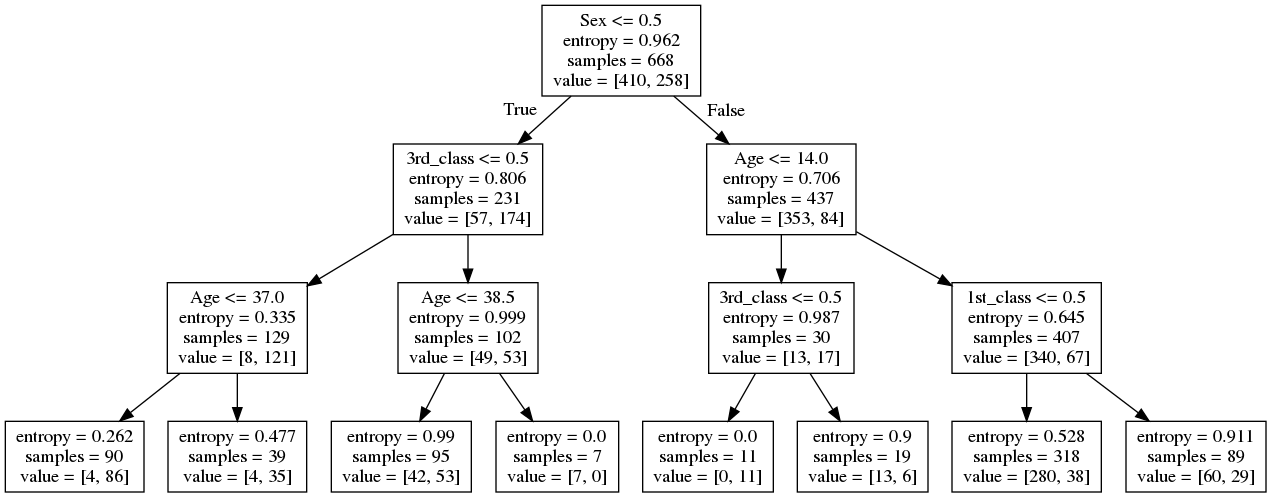

In [31]:
command_buf = io.StringIO() 
export_graphviz(model, out_file=command_buf, feature_names=['Age','Sex','1st_class','2nd_class','3rd_class']) 
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0] 
image = graph.create_png()
Image(image)

In [32]:
confusion_matrix(y_train, model.predict(X_train))

array([[360,  50],
       [ 73, 185]])

In [33]:
confusion_matrix(y_test, model.predict(X_test))

array([[119,  20],
       [ 25,  59]])

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          0       0.83      0.88      0.85       410
          1       0.79      0.72      0.75       258

avg / total       0.81      0.82      0.81       668



In [35]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.83      0.86      0.84       139
          1       0.75      0.70      0.72        84

avg / total       0.80      0.80      0.80       223

